In [3]:
import seaborn as sns

In [ ]:
mpg = sns.load_dataset('mpg')

In [ ]:
mpg ## 연비 측정 데이터

In [ ]:
mpg.info() ## horsepower 6개가 미싱데이터

In [ ]:
## 데이터의 부분을 보는 명령어
mpg.head(10).describe()

In [ ]:
mpg.tail(10).describe()

In [ ]:
mpg.sample(10)


In [ ]:
## 처음수집, 뒤에수집한거랑 다른경우가 매우많다. 1 2 디스크라이브 그다음 헤드 테일 샘플 쓴다 => 데이터 수집이 일정하게 되는지 안되는지 체크
# 최신데이터, 1년전 데이터랑 다른 경우가 진짜 많다. 시계열 데이터 일경우


In [ ]:
!pip install missingno

In [175]:
import missingno as mino

In [ ]:
dir(mino)

In [ ]:
mino.matrix(mpg)  ## 홀스에 에러가 있다.
                ## 미싱 데이터가 기똥차게 보인다. 뒤에 에러많으면 버린다.

In [ ]:
mino.bar(mpg)

In [ ]:
mino.dendrogram(mpg)

In [ ]:
mino.heatmap(mpg)

In [ ]:
################

In [ ]:
mpg.horsepower.isna() # na 인지 아닌지  (predicate함수 ) ## 트루 폴스 마스킹기법 => 

In [ ]:
mpg[mpg.horsepower.isna()]## 트루 폴스 마스킹기법 => nan 들어있는값 찾아낼수 있다.

In [ ]:
mpg.horsepower.isna().sum()

In [ ]:
import pandas as pd

In [ ]:
pd.isna == pd.isnull

In [ ]:
pd.isna is pd.isnull   ## isna 랑 isnull 똑같은함수

In [ ]:
## 예측 분석 할떄는 nan 있어도 되거든
## 기계학습 싸이킷, 텐서플로 nan 값 있으면 학습 안됨
## 통계 분석 할때는 nan 있으면 똑바로 안나온다.

In [ ]:
mpg.dropna()  ##how any 한개라도 드랍값이 있으면 그줄 다지워버림 all 전체 데이터가 na인경우에만 지우는거 all

In [ ]:
## 가짜 데이터 집어넣자 지우는거 별로 안좋다 좆만해서 양이
mpg[mpg.horsepower.isna()]

In [ ]:
mpg.fillna ## 특정값 넣는방법 비슷한값 넣는 방법 => interpolate보간법 비슷한구간 평균, 전체구간 평균, knn 방법으로 가짜 데이터 만들어서 집어넣는다.

In [ ]:
# 콜드 스타트 문제 데이터가 처음에 없어가지고 알고리즘등이 작동이 안되는게 콜드 스타트 추천시스템은 이런문제 많이 일어남
# 처음에는 가짜데이터 만들고 쓰다가 나중에 데이터 교체
# 콜드스타트 도메인 지식이 있어야함 노인복지 아동복지 추천 이런거 도메인지식 없어서 좆망햇엇음


In [ ]:
mpg.fillna(3).loc[32] ## loc iloc 결과 똑같다

In [176]:
from scipy import interpolate  # 싸이파이에 많다. 도메인에 따라서 다 다르다 프로젝트에 따라 알려줄거다.

In [ ]:
## 분석 고수들은 함수로 싹 만들고 데코레이터 붙이고이럼

In [ ]:
mpg.describe().T.plot.bar() ##인덱스가 X축 


In [ ]:
#weight 뺴고시펑 넘 눈에 튐
mpg.columns[:-2]

In [ ]:
mpg[mpg.columns[1:4]] ## 1차기 떄문에 mpg.columns[1,2,3,4] 안됨

In [ ]:
mpg.filter(regex="[^weight]").describe().T.plot.bar()# regex 로 weight 뺼수있따.

In [ ]:
# 팬시인덱싱, 딕셔너리, 어트리뷰트로 필터, 샐렉트 디타입 내가원하는 컬럼 뽑는법 5가지  re!! 팬시 인덱싱

In [ ]:
mpg.select_dtypes('object') ## 데이타 타입에 따라 뽑음 ## 5가지 방법  자유자재 쓸수 있어야함 젤 어려운게 filter

In [ ]:
mpg.filter(regex="[^weight]").describe().T.plot.bar(stacked=True)

In [ ]:
mpg.filter(regex="[^weight]").describe().T.plot.bar(stacked=True); ## output 사라진다

C:\Users\legen\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\legen\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

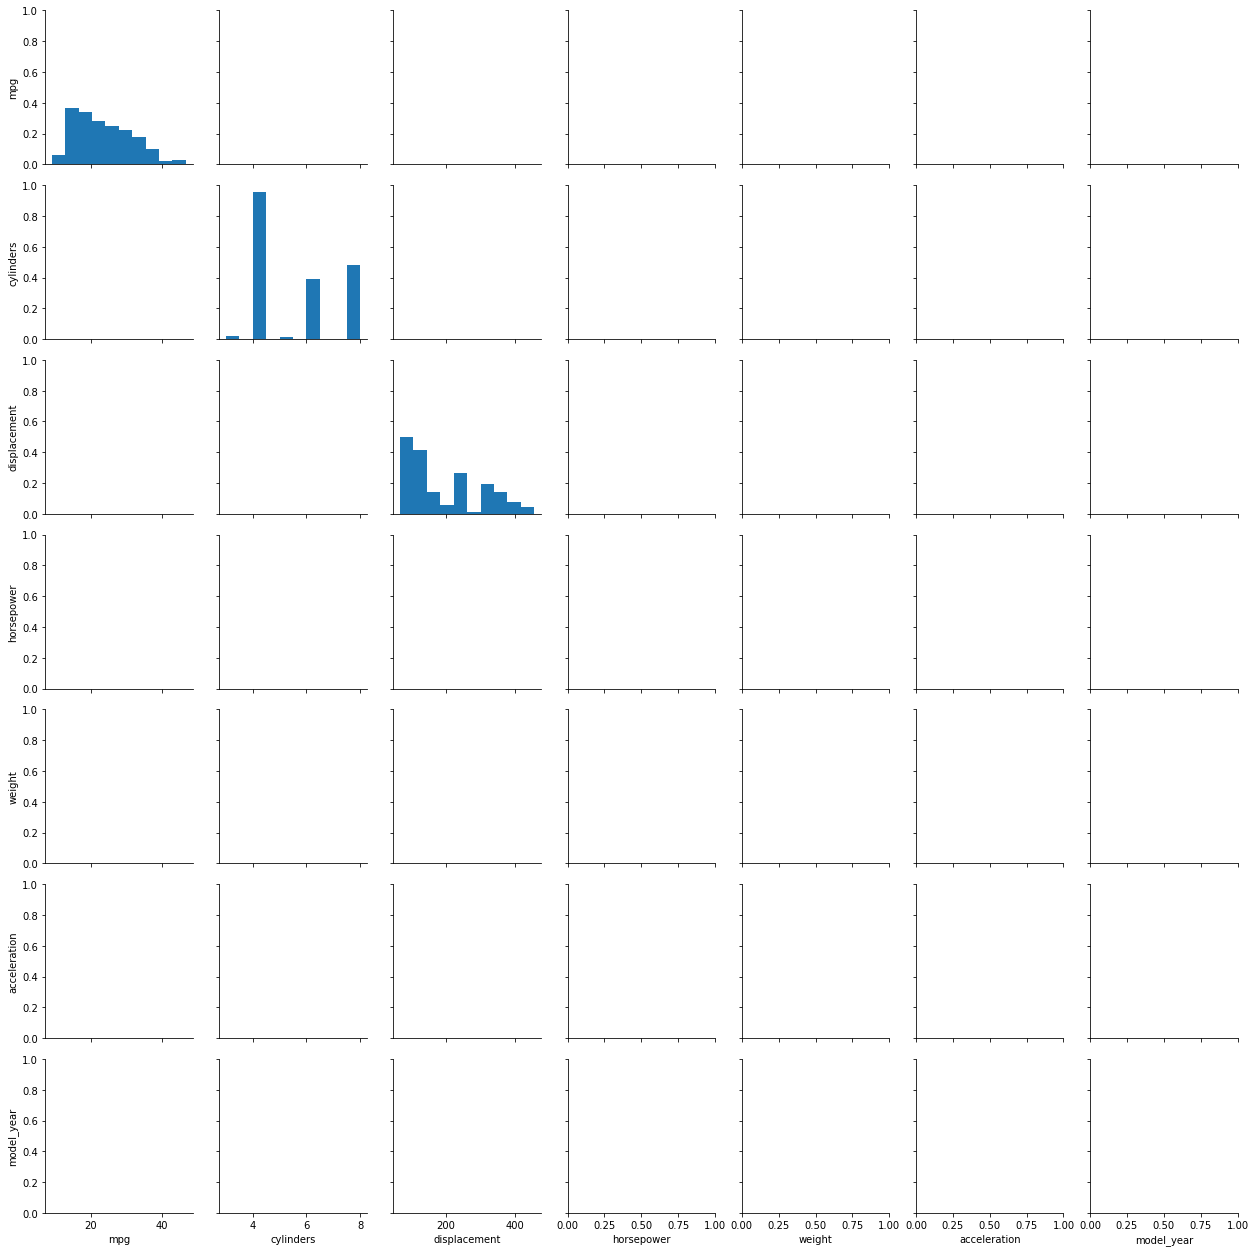

In [177]:
import seaborn as sns
sns.pairplot(mpg)

In [ ]:
## mpg data는 페어플랏이 약해  클래시피케이션일떄는 페어플랏 좋지만 리그레이션(회귀분석)일떄는 별로 안좋다

In [ ]:
mpg.corr() ## 상관계수 피어스 스피어만 켄달

In [ ]:
mpg.cov() # 공분산

In [ ]:
sns.heatmap(mpg.corr(), annot=True, cbar=False); ## 상관계수 보인다

In [ ]:
## 다중공선성 => 피쳐 셀렉션에 쓴다. 상관분석 중요 요인중 하나
## 내일 다시 해볼거


In [ ]:
mpg.boxplot()

In [ ]:
mpg.filter(regex="[^weight]").boxplot()

In [ ]:
## cf 1만시간의법칙 책 2장 1만시간 프로그래머

In [ ]:
## od outlyer detection 딥러닝으로 기법으로 기똥차게 만든거 pyod

## 아웃라이어는 모델의 예측성능을 되게 낮춘다.
## 막없앴다가 성능이 떨어질수도있다. 중요한거일수도 있어서 
## 클라우드 딕텍션?
## 복잡한 모델을 써서 아웃라이어를 없앨까 살릴까를 결정한다.

## 딥러닝 뉴럴 네트워크 데이타 노말라이제이션
## 박스 플럿에서는 머신러닝하기전에 노말라이제이션한다.


In [ ]:
mpg.describe([.00005,.5,.75])  ## 대충 값체크해서 어느정도를 할지 보는거 퍼센트 설정 됨 re!! 

In [ ]:
### 여기까지는 모든데이터 똑깥이


In [ ]:
## 이제는 데이터마다 다른 접근방법

In [1]:
pew = pd.read_csv('C:\\Users\legen\\Desktop\\pew.txt', sep='\t') # delimiter = '\t' 둘이 똑같다

NameError: name 'pd' is not defined

In [2]:
pew

NameError: name 'pew' is not defined

In [ ]:
## 갑자기 200k가 중요하다 또 스키마를 바꿔야 한다 => 존나 불편
# 이표가 한눈에 들어오니 좋아한다.
# 자주있는 실수
## 이런 데이터폼으로 만든거 => wide포맷

## 이걸 바꾸는게 long form

In [ ]:
pew.melt(['religion']) #long format 분석용으로 쓰는 데이타

In [ ]:
pew.melt(['religion'], var_name="문", value_name='근영') ## rename 으로 한방에 바꿀수도 있다 

In [ ]:
pew = pew.melt(['religion'])

In [ ]:
pew.info()

In [ ]:
pew # groupcount, value count 이런거 다 된다. 전에꺼는 describe 의미가 없었는데 이거는 describe 의미가 있다.

In [ ]:
pew.describe()

In [ ]:
pew.groupby('variable').mean() ## 분석할떄 쓰는 포맷으로 바꿔줘야 한다.

In [ ]:
## tidey data 가 아니면 이렇게 만들어줘야 한다.

In [ ]:
weather = pd.read_csv('C:\\Users\legen\\Desktop\\weather.txt', delimiter='\t') # delimiter = '\t' 둘이 똑같다

In [ ]:
weather

In [ ]:
weather = weather.melt(weather.columns[:4],var_name='day').dropna() # 고정하고싶은애들 4개 # ## re!! var_name 이 저렇게 바뀌나

In [ ]:
weather

In [ ]:
weather.describe() ##

In [ ]:
weather.drop(columns=["id","year"], inplace=True)

In [ ]:
weather

In [ ]:
weather.reset_index(drop=True, inplace=True)  ## rere!! ㅅㅂ다시

In [ ]:
weather

In [ ]:
weather.day = weather.day.str.replace('d','')
weather.day= weather.day.astype('int64')
weather.sort_values('month', inplace = True)
weather.reset_index(drop=True ,inplace=True)

In [ ]:
weather

In [185]:
weather = pd.read_csv('C:\\Users\legen\\Desktop\\weather.txt', sep='\t') # delimiter = '\t' 둘이 똑같다

In [186]:
weather

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX000017004,2010,1,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.0,NaN
1,MX000017004,2010,1,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,NaN
2,MX000017004,2010,2,TMAX,NaN,273.0,241.0,NaN,NaN,NaN,...,NaN,299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX000017004,2010,2,TMIN,NaN,144.0,144.0,NaN,NaN,NaN,...,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX000017004,2010,3,TMAX,NaN,NaN,NaN,NaN,321.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX000017004,2010,3,TMIN,NaN,NaN,NaN,NaN,142.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX000017004,2010,4,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,363.0,NaN,NaN,NaN,NaN
7,MX000017004,2010,4,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,167.0,NaN,NaN,NaN,NaN
8,MX000017004,2010,5,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,332.0,NaN,NaN,NaN,NaN
9,MX000017004,2010,5,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,182.0,NaN,NaN,NaN,NaN


In [ ]:
pd.wide_to_long(weather,'d',['id','year','month','element'],'').dropna()
## 멀티인덱스 공통된걸 싹다 그룹화 시켰다 좀더 보기가 편하다.
## melt쓰는 방식, 이거보다 조금 이쁘다.

In [ ]:
#데이터타입, 이름, 고치고 => TIDY DATA 만든다 # 관계형 DB 안쓰면 존나 줫같다 컬럼들이 씨벌 쓰면 깔끔하다

In [183]:
billboard = pd.read_csv('C:\\Users\legen\\Desktop\\billboard.csv', parse_dates=True, date_parse) # delimiter = '\t' 둘이 똑같다

SyntaxError: positional argument follows keyword argument (<ipython-input-183-cf383d1bf2cc>, line 1)

In [184]:
billboard ## 인자중 date_parser가 있다.

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
pd.wide_to_long(billboard, )

TypeError: wide_to_long() missing 3 required positional arguments: 'stubnames', 'i', and 'j'

In [ ]:
# https://docs.scipy.org/doc/numpy/user/basics.rec.html?highlight=struc#module-numpy.doc.structured_arrays